In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
data.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in data.columns:
    print(data[column].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      2

In [7]:
#Checking for null values
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
#Dropping the columns which are not useful
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [9]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [12]:
data['location'].value_counts()

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [13]:
#filling the null value in data['location']
data['location'] = data['location'].fillna('Sarjapur Road')

In [14]:
data['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [15]:
#filling the null value in data['size']
data['size'] = data['size'].fillna('2 BHK')

In [16]:
#filling the null value in data['bath']
data['bath'] = data['bath'].fillna(data['bath'].median())

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [18]:
#splitting the bhk like 3 bhk(str) into 3 (int)
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [19]:
#Checking bhk data which are greater then 20.
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
#Splitting the values in 'total_sqft'
def ConvertRange(x):

    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[0]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
data['total_sqft']= data['total_sqft'].apply(ConvertRange)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
sns.set(style = 'whitegrid')

Text(0.5, 0, 'price(Laks)')

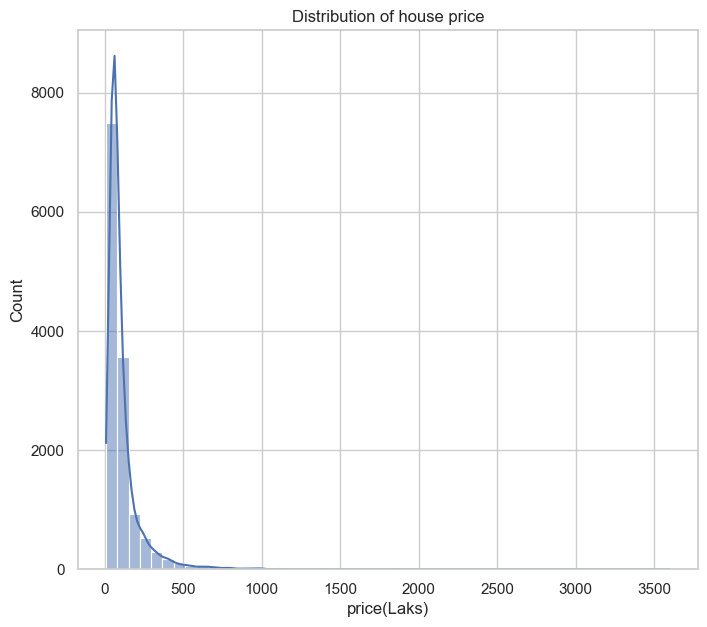

In [25]:
#Distribution of house price
plt.figure(figsize=(8,7))
sns.histplot(data['price'],bins = 50, kde= True)
plt.title('Distribution of house price')
plt.xlabel('price(Laks)')

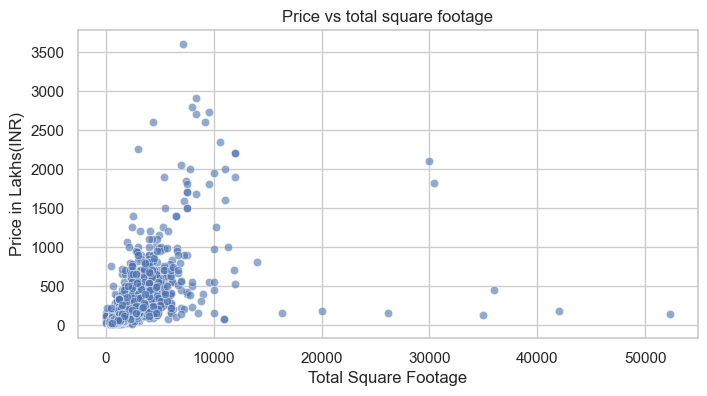

In [26]:
#Price vs Total square footage(scatter plot)
plt.figure(figsize = (8,4))
sns.scatterplot(x = data['total_sqft'], y = data['price'], alpha = 0.6)
plt.title('Price vs total square footage')
plt.xlabel('Total Square Footage')
plt.ylabel('Price in Lakhs(INR)')
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_7872\1023141622.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_loc.index, y=avg_price_by_loc.values, palette='viridis')


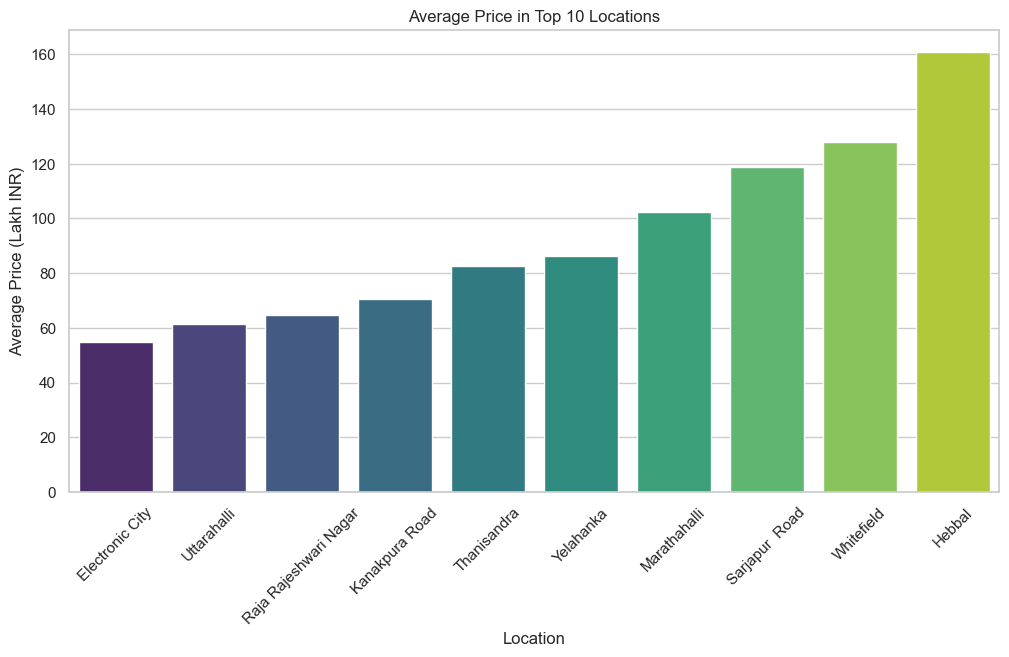

In [27]:
#bar plot of average price in top 10 location
top_locations = data['location'].value_counts().head(10).index
avg_price_by_loc = data[data['location'].isin(top_locations)].groupby('location')['price'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_loc.index, y=avg_price_by_loc.values, palette='viridis')
plt.title('Average Price in Top 10 Locations')
plt.ylabel('Average Price (Lakh INR)')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.show()

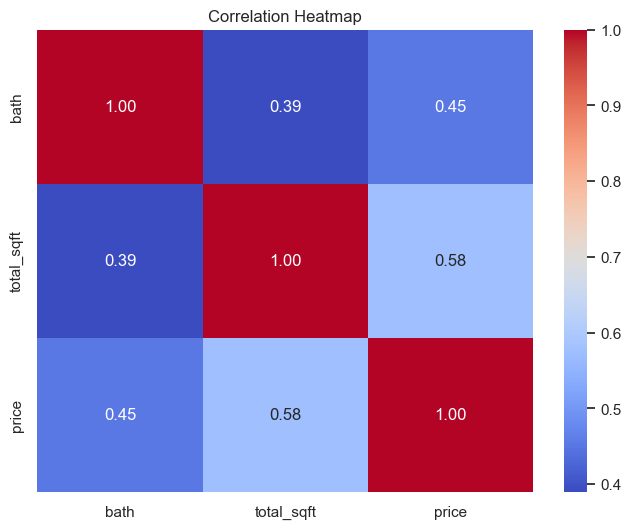

In [28]:
#Correlation heatmap of bath , total sqft and price
num_cols = ['bath', 'total_sqft', 'price']
corr_matrix = data[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [29]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']

In [30]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [31]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1556.594994,2.688814,112.565627,2.802778,7.917375e+03
std,1236.094294,1.338754,148.971674,1.294496,1.064295e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.271964e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.447031e+03
75%,1677.750000,3.000000,120.000000,3.000000,7.327287e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [32]:
data['location'].value_counts()

location
Whitefield           540
Sarjapur  Road       399
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Sabari Nagar           1
Ashraya Layout         1
Shauhardha Layout      1
Kudlu Village,         1
Chikkanahalli          1
Name: count, Length: 1306, dtype: int64

In [33]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_count = data['location'].value_counts()

In [34]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

location
Sector 1 HSR Layout         10
Nagadevanahalli             10
Dairy Circle                10
1st Block Koramangala       10
Naganathapura               10
                            ..
Prasanti Nagar               1
Banasawadi,                  1
Sunkan palya                 1
Gayathri Nagar               1
Old Mangammanapalya Road     1
Name: count, Length: 1054, dtype: int64

In [35]:
data['location'] = data['location'].apply(lambda x : 'others' if x in location_count_less_10 else x)

In [36]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1556.594994,2.688814,112.565627,2.802778,7.917375e+03
std,1236.094294,1.338754,148.971674,1.294496,1.064295e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.271964e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.447031e+03
75%,1677.750000,3.000000,120.000000,3.000000,7.327287e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [37]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       573.890693
std        387.565834
min          0.250000
25%        472.750000
50%        551.666667
75%        625.000000
max      26136.000000
dtype: float64

In [38]:
data = data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,1591.515454,2.559626,111.394754,2.650942,6314.486738
std,1258.990996,1.078001,152.086286,0.976722,4163.890336
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4216.696674
50%,1300.000000,2.000000,70.000000,3.000000,5300.000000
75%,1700.000000,3.000000,115.000000,3.000000,6923.972419
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [39]:
data.shape

(12528, 7)

In [40]:
data.price_per_sqft.describe()

count     12528.000000
mean       6314.486738
std        4163.890336
min         267.829813
25%        4216.696674
50%        5300.000000
75%        6923.972419
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def remove_outlier_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft> (m-st)) & (subdf.price_per_sqft<=(m+st))]

        df_output = pd.concat([df_output,gen_df],ignore_index = True)

    return df_output
data = remove_outlier_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10324.000000,10324.000000,10324.000000,10324.000000,10324.000000
mean,1505.988052,2.473072,91.341030,2.574487,5670.042441
std,877.801433,0.981447,86.341784,0.897526,2265.809107
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1107.830000,2.000000,49.000000,2.000000,4250.000000
50%,1285.000000,2.000000,67.000000,2.000000,5188.679245
75%,1650.000000,3.000000,100.000000,3.000000,6445.459137
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [42]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] ={
                'mean':np.mean([bhk_df.price_per_sqft]),
                'std' : np.std([bhk_df.price_per_sqft]),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis= 'index')


In [43]:
data = bhk_outlier_remover(data)

In [44]:
data.shape

(7358, 7)

In [45]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10315,others,2 BHK,1200.0,2.0,70.0,2,5833.333333
10316,others,1 BHK,1800.0,1.0,200.0,1,11111.111111
10319,others,2 BHK,1353.0,2.0,110.0,2,8130.081301
10320,others,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [46]:
data.drop(columns = ['size','price_per_sqft'], inplace = True)

In [47]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [48]:
df = pd.read_csv('cleaned_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_data.csv'

In [ ]:
df

In [ ]:
x = df.drop(columns = ['price'])
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
#using train test and split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:

column_trans = make_column_transformer((OneHotEncoder(sparse_output = False), ['location']), remainder = 'passthrough')

In [ ]:
lr = make_pipeline(column_trans, StandardScaler(), LinearRegression())

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
y_pred_lr = lr.predict(x_test)

In [ ]:
r2_score(y_test, y_pred_lr)

In [ ]:
lasso = Lasso()

In [ ]:
pipe = make_pipeline(column_trans, StandardScaler(), lasso)

In [ ]:
pipe.fit(x_train, y_train)

In [ ]:
y_pred_lasso = pipe.predict(x_test)
r2_score(y_test, y_pred_lasso)

In [ ]:
ridge = Ridge()

In [ ]:
pipe = make_pipeline(column_trans, StandardScaler(), ridge)

In [ ]:
pipe.fit(x_train, y_train)

In [ ]:
y_pred_ridge = pipe.predict(x_test)
r2_score(y_test, y_pred_ridge)

In [ ]:
print('No Regularization:',r2_score(y_test, y_pred_lr))
print('lasso:',r2_score(y_test, y_pred_lasso))
print('Ridge:',r2_score(y_test, y_pred_ridge))

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe, open('RidgeModel.pkl','wb'))